# Toronto Crime Rates Analysis

# Part 1: Toronto's Major Crime Indicators Compared





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

# 1. Loading the Dataset

Fortunetly, Toronto Police Service provide a public safety data portal which contains a number of useful crime data sets. From here, I seleted the "MCI 2014 to 2018" spreadsheet which includes all Major Crime Indicators (MCI) 2014 to 2018 occurrences by reported date and related offences: http://data.torontopolice.on.ca/datasets/mci-2014-to-2018

Upon downloading this file, I did some preprocessing and loaded the file.

In [2]:
toronto_crime = pd.read_csv('./Toronto_MCI.csv')

In [3]:
toronto_crime.occurrenceyear.unique()

array([2014., 2015., 2016., 2017., 2018.,   nan])

# 2. Data Cleaning and Preparation

#### Checking for NaN Values
- Although these were removed during the preprocessing of the data, I wanted to ensure none were loaded during the loading process


In [4]:
nan_df = toronto_crime[toronto_crime.isnull().any(axis=1)]
nan_df[:]

,event_unique_id,occurrencedate,premisetype,offence,occurrenceyear,occurrencemonth,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Neighbourhood,Lat,Long
166500,GO-2015643612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166501,GO-2015641587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166502,GO-2015657994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166503,GO-2015669925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166504,GO-2015515110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167520,GO-2018885860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167521,GO-2018939395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167522,GO-2018940481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167523,GO-2018940756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
toronto_crime = toronto_crime.dropna(how='any')


In [6]:
nan_df = toronto_crime[toronto_crime.isnull().any(axis=1)]
nan_df

,event_unique_id,occurrencedate,premisetype,offence,occurrenceyear,occurrencemonth,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Neighbourhood,Lat,Long


#### Change the columns to the appropriate data types

In [7]:
toronto_crime.dtypes

event_unique_id         object
occurrencedate          object
premisetype             object
offence                 object
occurrenceyear         float64
occurrencemonth         object
occurrenceday          float64
occurrencedayofyear    float64
occurrencedayofweek     object
occurrencehour         float64
MCI                     object
Neighbourhood           object
Lat                    float64
Long                   float64
dtype: object

##### Based on this, the only change I needed to make was on the occurrencedata column.

In [8]:
toronto_crime['occurrencedate'] = pd.to_datetime(toronto_crime['occurrencedate'])

In [9]:
toronto_crime.dtypes

event_unique_id                     object
occurrencedate         datetime64[ns, UTC]
premisetype                         object
offence                             object
occurrenceyear                     float64
occurrencemonth                     object
occurrenceday                      float64
occurrencedayofyear                float64
occurrencedayofweek                 object
occurrencehour                     float64
MCI                                 object
Neighbourhood                       object
Lat                                float64
Long                               float64
dtype: object

# 3. Analysis

In [10]:
toronto_crime.MCI.unique()

array(['Theft Over', 'Assault', 'Robbery', 'Break and Enter',
       'Auto Theft'], dtype=object)

In [11]:
#Assault
assault_df = toronto_crime[toronto_crime['MCI'].str.contains('Assault')]

In [12]:
#Break and Enter
break_and_enter_df = toronto_crime[toronto_crime['MCI'].str.contains('Break and Enter')]

In [13]:
#theft over
theft_over_df = toronto_crime[toronto_crime['MCI'].str.contains('Theft Over')]

In [14]:
#robbery
robbery_df = toronto_crime[toronto_crime['MCI'].str.contains('Robbery')]

In [15]:
#auto theft
autotheft_df = toronto_crime[toronto_crime['MCI'].str.contains('Auto Theft')]

### Total Number of Each MCI Offence in Toronto (2014 - 2018)

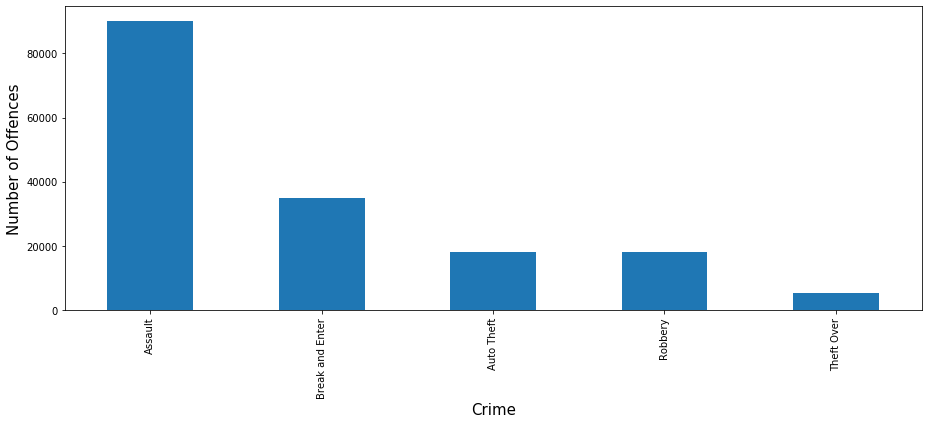

In [16]:
#Plot
width = 13
height = 6
plt.figure(figsize=(width, height))

common_crime = toronto_crime['MCI'].value_counts()
common_crime.plot.bar()
plt.xlabel('Crime',  fontsize=15)
plt.ylabel('Number of Offences',  fontsize=15)
plt.tight_layout()
plt.show()

### MCIs Compared from 2014 - 2018


<b>Assault</b>

In [17]:
#group by the year and month
assault_monthly_year = assault_df.groupby(['occurrenceyear','occurrencemonth']).count()['offence']
#convert to a dataframe and reset the index
assault_monthly_year_df = assault_monthly_year.to_frame().reset_index()
assault_monthly_year_df.head()

,occurrenceyear,occurrencemonth,offence
0,2014.0,April,1233
1,2014.0,August,1475
2,2014.0,December,1323
3,2014.0,February,1156
4,2014.0,January,1270


In [18]:
#Add a new column for Month + Year
#This can be used for the x axis providing each df is sorted
assault_monthly_year_df["Month"] =  assault_monthly_year_df["occurrencemonth"] + " " + assault_monthly_year_df["occurrenceyear"].map(str)

In [19]:
#sort the dataframe by firstly categorising the months
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
#categorise the occurrencemonth column
assault_monthly_year_df['occurrencemonth'] = pd.Categorical(assault_monthly_year_df['occurrencemonth'], categories=months, ordered=True)

#sort the df, first by year then month
assault_monthly_year_df = assault_monthly_year_df.sort_values(['occurrenceyear', 'occurrencemonth'])
assault_monthly_year_df.head()

,occurrenceyear,occurrencemonth,offence,Month
4,2014.0,January,1270,January 2014.0
3,2014.0,February,1156,February 2014.0
7,2014.0,March,1215,March 2014.0
0,2014.0,April,1233,April 2014.0
8,2014.0,May,1490,May 2014.0


<b>Break and Enter</b>

In [20]:
#group by the year and month
break_monthly_year = break_and_enter_df.groupby(['occurrenceyear','occurrencemonth']).count()['offence']
#convert to a dataframe and reset the index
break_monthly_year_df = break_monthly_year.to_frame().reset_index()
break_monthly_year_df.head()

,occurrenceyear,occurrencemonth,offence
0,2014.0,April,624
1,2014.0,August,630
2,2014.0,December,555
3,2014.0,February,472
4,2014.0,January,578


In [21]:
#sort the dataframe by firstly categorising the months
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
#categorise the occurrencemonth column
break_monthly_year_df['occurrencemonth'] = pd.Categorical(break_monthly_year_df['occurrencemonth'], categories=months, ordered=True)

#sort the df, first by year then month
break_monthly_year_df = break_monthly_year_df.sort_values(['occurrenceyear', 'occurrencemonth'])
break_monthly_year_df.head()

,occurrenceyear,occurrencemonth,offence
4,2014.0,January,578
3,2014.0,February,472
7,2014.0,March,563
0,2014.0,April,624
8,2014.0,May,626


<b>Robbery</b>

In [22]:
#group by the year and month
robbery_monthly_year = robbery_df.groupby(['occurrenceyear','occurrencemonth']).count()['offence']
#convert to a dataframe and reset the index
robbery_monthly_year_df = robbery_monthly_year.to_frame().reset_index()

In [23]:
#sort the dataframe by firstly categorising the months
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
#categorise the occurrencemonth column
robbery_monthly_year_df['occurrencemonth'] = pd.Categorical(robbery_monthly_year_df['occurrencemonth'], categories=months, ordered=True)

#sort the df, first by year then month
robbery_monthly_year_df = robbery_monthly_year_df.sort_values(['occurrenceyear', 'occurrencemonth'])

<b>Auto Theft</b>

In [24]:
#group by the year and month
autotheft_monthly_year = autotheft_df.groupby(['occurrenceyear','occurrencemonth']).count()['offence']
#convert to a dataframe and reset the index
autotheft_monthly_year_df = autotheft_monthly_year.to_frame().reset_index()


In [25]:
#sort the dataframe by firstly categorising the months
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
#categorise the occurrencemonth column
autotheft_monthly_year_df['occurrencemonth'] = pd.Categorical(autotheft_monthly_year_df['occurrencemonth'], categories=months, ordered=True)

#sort the df, first by year then month
autotheft_monthly_year_df = autotheft_monthly_year_df.sort_values(['occurrenceyear', 'occurrencemonth'])


<b>Theft Over</b>

In [26]:
#group by the year and month
theftover_monthly_year = theft_over_df.groupby(['occurrenceyear','occurrencemonth']).count()['offence']
#convert to a dataframe and reset the index
theftover_monthly_year_df = theftover_monthly_year.to_frame().reset_index()


In [27]:
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
#categorise the occurrencemonth column
theftover_monthly_year_df['occurrencemonth'] = pd.Categorical(theftover_monthly_year_df['occurrencemonth'], categories=months, ordered=True)

#sort the df, first by year then month
theftover_monthly_year_df = theftover_monthly_year_df.sort_values(['occurrenceyear', 'occurrencemonth'])


In [28]:
# Axis values
month_assault = assault_monthly_year_df['Month']
no_offences_assault = assault_monthly_year_df['offence']
no_offences_break = break_monthly_year_df['offence']
no_offences_robbery  = robbery_monthly_year_df['offence']   
no_offences_auto = autotheft_monthly_year_df['offence']
no_offences_theft = theftover_monthly_year_df['offence']


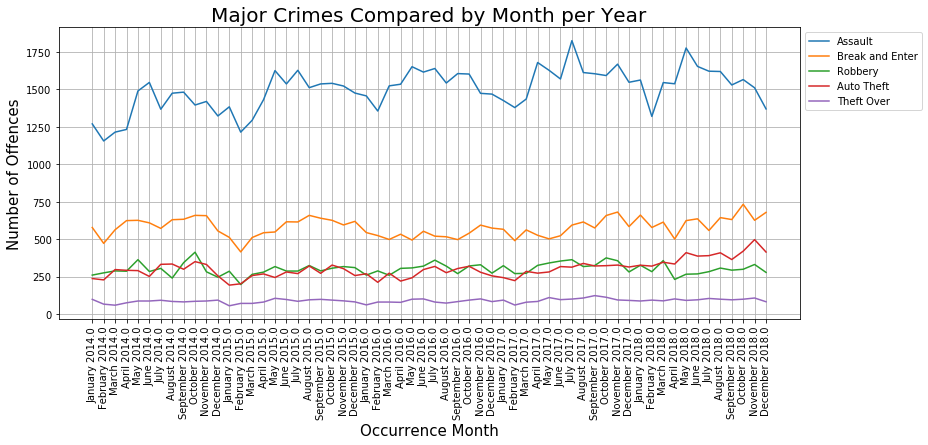

In [29]:
#Plot


plt.figure(figsize=(width, height))

plt.plot(month_assault,no_offences_assault)
plt.plot(month_assault,no_offences_break)
plt.plot(month_assault,no_offences_robbery)
plt.plot(month_assault,no_offences_auto)
plt.plot(month_assault,no_offences_theft)

plt.legend(['Assault', 'Break and Enter','Robbery','Auto Theft','Theft Over'], bbox_to_anchor=(1,1))

plt.ylabel('Number of Offences', fontsize=15)
plt.xlabel('Occurrence Month', fontsize=15)
plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()
plt.title('Major Crimes Compared by Month per Year',fontsize = 20)
plt.show()

### The Day of the Month a Major Crime is Most Likely to Occur (2018)

In [30]:
#convert to string
assault_df['occurrenceyear'] = assault_df['occurrenceyear'].astype(str)
break_and_enter_df['occurrenceyear'] = break_and_enter_df['occurrenceyear'].astype(str)
theft_over_df['occurrenceyear'] = theft_over_df['occurrenceyear'].astype(str)
robbery_df['occurrenceyear'] = robbery_df['occurrenceyear'].astype(str)
autotheft_df['occurrenceyear'] = autotheft_df['occurrenceyear'].astype(str)

/Users/niallyorke/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/niallyorke/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/niallyorke/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [31]:
assault_2018 = assault_df[assault_df['occurrenceyear'].str.contains('2018')]
break_2018 = break_and_enter_df[break_and_enter_df['occurrenceyear'].str.contains('2018')]
robbery_2018 = robbery_df[robbery_df['occurrenceyear'].str.contains('2018')]
autotheft_2018 = autotheft_df[autotheft_df['occurrenceyear'].str.contains('2018')]
theft_over_2018 = theft_over_df[theft_over_df['occurrenceyear'].str.contains('2018')]

In [32]:
#Plot Variables

#Assault
assault_day_month = assault_2018.groupby('occurrenceday').count()['MCI']

assault_day_month_df = assault_day_month.to_frame().reset_index()
assault_count_for_days_month = assault_day_month_df['MCI']

#B&E
be_day_month = break_2018.groupby('occurrenceday').count()['MCI']

break_day_month_df = be_day_month.to_frame().reset_index()
break_count_for_days_month = break_day_month_df['MCI']

#Robbery
rob_day_month = robbery_2018.groupby('occurrenceday').count()['MCI']

rob_day_month_df = rob_day_month.to_frame().reset_index()
rob_count_for_days_month = rob_day_month_df['MCI']

#AutoTheft
auto_day_month = autotheft_2018.groupby('occurrenceday').count()['MCI']

auto_day_month_df = auto_day_month.to_frame().reset_index()
auto_count_for_days_month = auto_day_month_df['MCI']

#TheftOver
over_day_month = theft_over_2018.groupby('occurrenceday').count()['MCI']

over_day_month_df = over_day_month.to_frame().reset_index()
over_count_for_days_month = over_day_month_df['MCI']

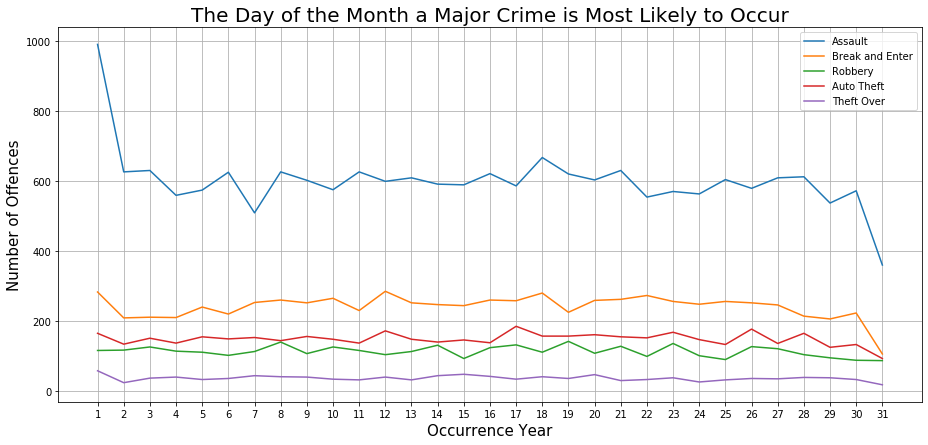

In [33]:
#X Axis
days_month = assault_day_month_df['occurrenceday']

plt.figure(figsize=(width, height))

plt.plot(days_month,assault_count_for_days_month)
plt.plot(days_month,break_count_for_days_month)
plt.plot(days_month,rob_count_for_days_month)
plt.plot(days_month,auto_count_for_days_month)
plt.plot(days_month,over_count_for_days_month)

plt.legend(['Assault', 'Break and Enter','Robbery','Auto Theft','Theft Over'], bbox_to_anchor=(1,1))

plt.ylabel('Number of Offences', fontsize=15)
plt.xlabel('Occurrence Year', fontsize=15)
plt.xticks(days_month)
plt.grid()

plt.tight_layout()
plt.title('The Day of the Month a Major Crime is Most Likely to Occur',fontsize = 20)
plt.show()

### The Time of Day a Major Crime is Most Likely to Occur (2018)

In [34]:
#Assault 
assault_day_week = assault_2018.groupby('occurrencehour').count()['offence']
assault_day_week_df = assault_day_week.to_frame().reset_index()

#B&E
break_day_week = break_2018.groupby('occurrencehour').count()['offence']
break_day_week_df = break_day_week.to_frame().reset_index()

#Robbery
robbery_day_week = robbery_2018.groupby('occurrencehour').count()['offence']
robbery_day_week_df = robbery_day_week.to_frame().reset_index()

#AutoTheft
auto_day_week = autotheft_2018.groupby('occurrencehour').count()['offence']
auto_day_week_df = auto_day_week.to_frame().reset_index()

#TheftOver
theft_day_week = theft_over_2018.groupby('occurrencehour').count()['offence']
theft_day_week_df = theft_day_week.to_frame().reset_index()

In [35]:
#Variables for plot
assault_count_for_days_week = assault_day_week_df['offence']
break_count_for_days_week = break_day_week_df['offence']
robbery_count_for_days_week = robbery_day_week_df['offence']
auto_count_for_days_week = auto_day_week_df['offence']
over_count_for_days_week = theft_day_week_df['offence']

In [36]:
assault_count_for_days_week.to_frame()
break_count_for_days_week.to_frame()
robbery_count_for_days_week.to_frame()
auto_count_for_days_week.to_frame()
over_count_for_days_week.to_frame()

,offence
0,84
1,26
2,15
3,19
4,13
5,17
6,16
7,21
8,30
9,34


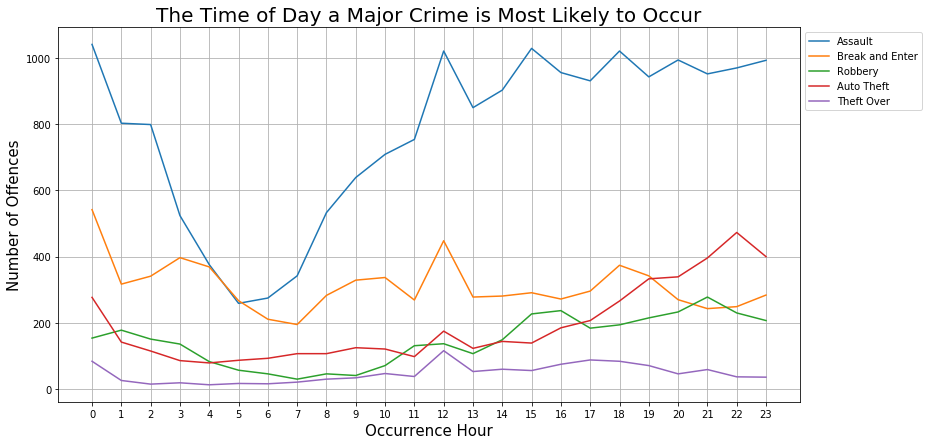

In [37]:
plt.figure(figsize=(width, height))

day_hour = assault_count_for_days_week.index

plt.plot(day_hour,assault_count_for_days_week)
plt.plot(day_hour,break_count_for_days_week)
plt.plot(day_hour,robbery_count_for_days_week)
plt.plot(day_hour,auto_count_for_days_week)
plt.plot(day_hour,over_count_for_days_week)

plt.ylabel('Number of Offences', fontsize=15)
plt.xlabel('Occurrence Hour', fontsize=15)
plt.xticks(day_hour)
plt.grid()

plt.legend(['Assault', 'Break and Enter','Robbery','Auto Theft','Theft Over'], bbox_to_anchor=(1,1))

plt.tight_layout()
plt.title('The Time of Day a Major Crime is Most Likely to Occur',fontsize = 20)
plt.show()